# تعریف مسئله: پیش بینی سری زمانی

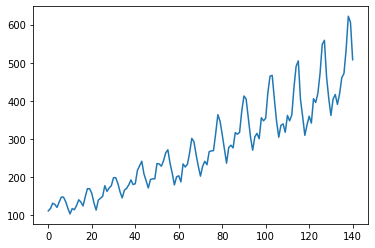

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
plt.plot(dataset)
plt.show()

# رگرسیون MLP

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [5]:
dataset= dataset.values.astype('float32')

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [7]:
#تبدیل آرایه ها به ماتریس دیتاست
def create_dataset(dataset, look_back=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-look_back-1):
        
        a = dataset[i:(i+look_back), 0]
        
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
create_dataset(dataset, look_back=1)

(array([[112.],
        [118.],
        [132.],
        [129.],
        [121.],
        [135.],
        [148.],
        [148.],
        [136.],
        [119.],
        [104.],
        [118.],
        [115.],
        [126.],
        [141.],
        [135.],
        [125.],
        [149.],
        [170.],
        [170.],
        [158.],
        [133.],
        [114.],
        [140.],
        [145.],
        [150.],
        [178.],
        [163.],
        [172.],
        [178.],
        [199.],
        [199.],
        [184.],
        [162.],
        [146.],
        [166.],
        [171.],
        [180.],
        [193.],
        [181.],
        [183.],
        [218.],
        [230.],
        [242.],
        [209.],
        [191.],
        [172.],
        [194.],
        [196.],
        [196.],
        [236.],
        [235.],
        [229.],
        [243.],
        [264.],
        [272.],
        [237.],
        [211.],
        [180.],
        [201.],
        [204.],
        [188.],
        

# آماده سازی دیتاست برای مدل سازی

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# ساخت و فیت کردن مدل MLP

In [12]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))

In [14]:
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 528.8125
Epoch 2/200
 - 0s - loss: 512.4753
Epoch 3/200
 - 0s - loss: 516.7395
Epoch 4/200
 - 0s - loss: 526.8686
Epoch 5/200
 - 0s - loss: 512.7062
Epoch 6/200
 - 0s - loss: 511.2896
Epoch 7/200
 - 0s - loss: 512.5765
Epoch 8/200
 - 0s - loss: 512.7827
Epoch 9/200
 - 0s - loss: 509.3414
Epoch 10/200
 - 0s - loss: 508.7927
Epoch 11/200
 - 0s - loss: 515.3497
Epoch 12/200
 - 0s - loss: 513.4119
Epoch 13/200
 - 0s - loss: 513.2566
Epoch 14/200
 - 0s - loss: 514.2121
Epoch 15/200
 - 0s - loss: 516.1355
Epoch 16/200
 - 0s - loss: 522.0579
Epoch 17/200
 - 0s - loss: 511.8649
Epoch 18/200
 - 0s - loss: 516.7137
Epoch 19/200
 - 0s - loss: 511.4610
Epoch 20/200
 - 0s - loss: 525.9406
Epoch 21/200
 - 0s - loss: 522.3188
Epoch 22/200
 - 0s - loss: 512.5024
Epoch 23/200
 - 0s - loss: 519.1271
Epoch 24/200
 - 0s - loss: 511.1293
Epoch 25/200
 - 0s - loss: 520.4094
Epoch 26/200
 - 0s - loss: 506.7295
Epoch 27/200
 - 0s - loss: 521.2872
Epoch 28/200
 - 0s - loss: 506.7800
E

In [15]:
# برآورد عملکرد مدل
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 503.72 MSE (22.44 RMSE)
Test Score: 2037.25 MSE (45.14 RMSE)


# ساخت و رسم پیش بینی

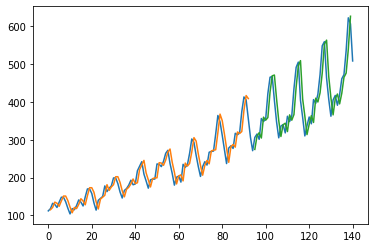

In [16]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Blue=Whole Dataset, Green=Training, Red=Predictions.